In [1]:
conda install shapely

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
from scipy.integrate import odeint  
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import LineString

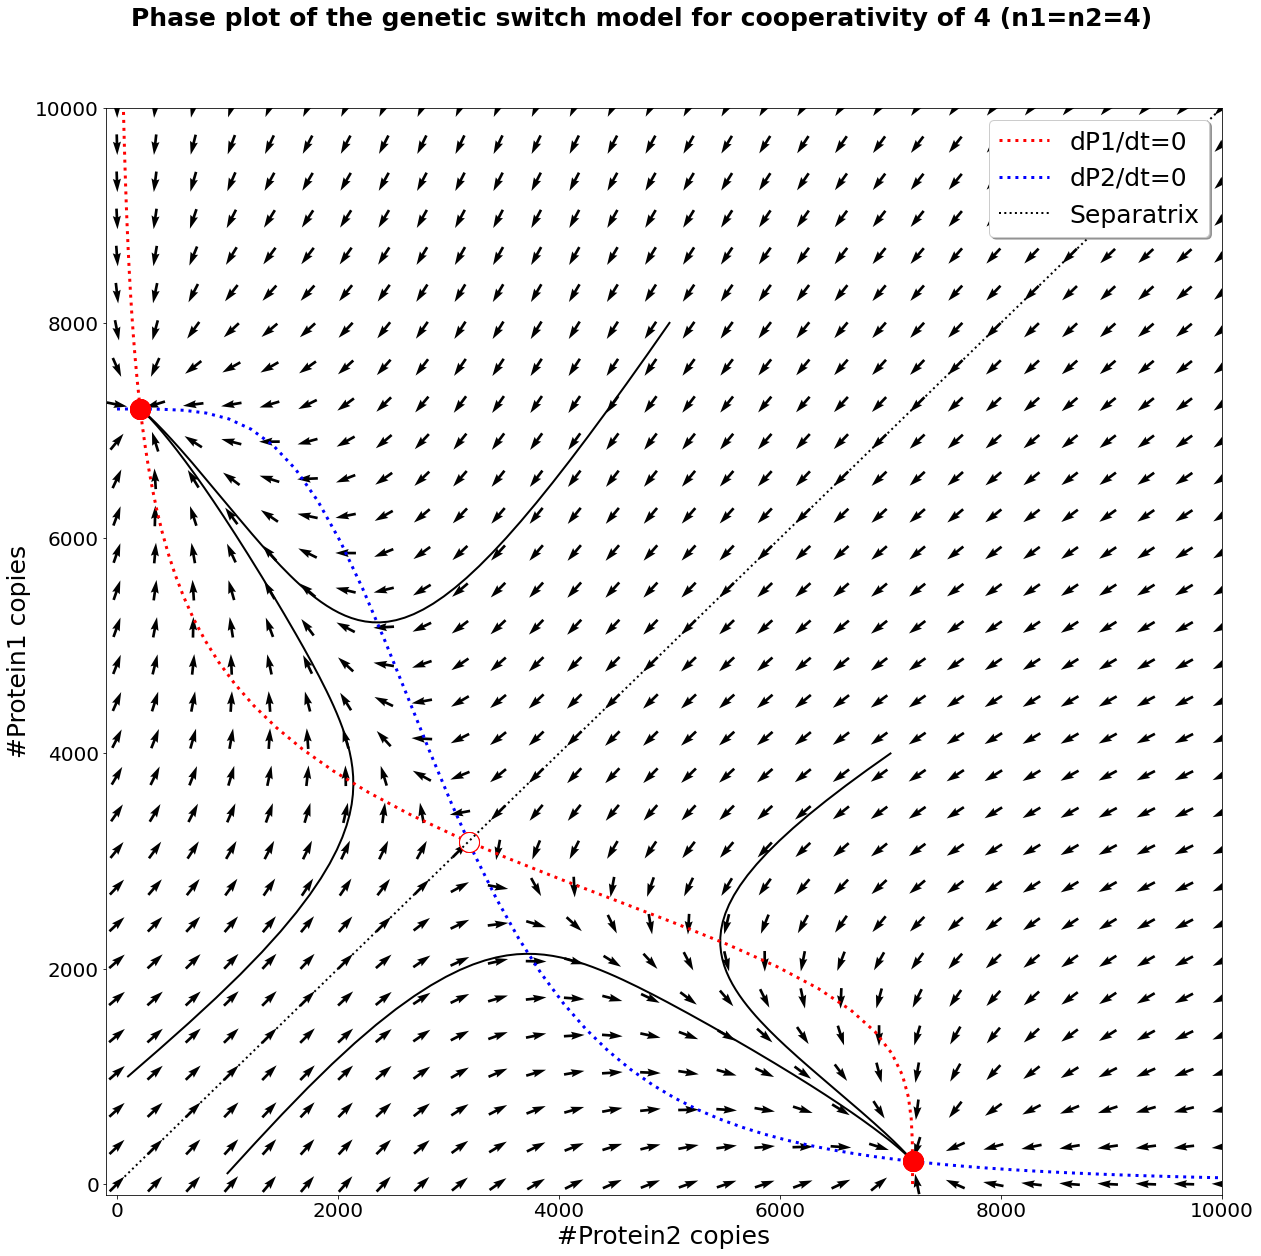

In [9]:
#Figure 6A

# import the direction_field function 
from helper_function import *

#define function
def sdot_toggle(s,t,params):
    # variables and parameters
    P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2 = params
    
    # rate equations
    rate_P1_production = kp1 * ((K2**n2)/(P2**n2 + K2**n2))
    rate_P2_production = kp2 * ((K1**n1)/(P1**n1 + K1**n1))
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dP1, dP2]
    return dsdt

# set parameters
kp1 = 120.0
kp2 = 120.0
kdp1 = 1.0/60.0
kdp2 = 1.0/60.0
K1 = 3000.0
K2 = 3000.0
n1=4.0
n2=4.0
params = [kp1, kp2, kdp1, kdp2, K1, K2, n1, n2]

# time points
t_start = 0
t_end = 10000
n_obs = 4000
t_obs = np.linspace(t_start, t_end, n_obs)

# make figure that the results will be plotted into
fig6 = plt.figure(figsize=(20,20))
fig6.suptitle('Phase plot of the genetic switch model for cooperativity of 4 (n1=n2=4) ', 
              fontsize=25, fontweight='bold', y=0.95)
ax1 = fig6.add_subplot(1,1,1)
ax1.set_xlim(-100,10000)
ax1.set_ylim(-100,10000)

# Generate 4 sets of initial conditions
s0_list = [ [100,1000], [1000,100], [7000,4000], [5000,8000] ]

# Calculate the values of P1 and P2 using odeint and plot results
for s0 in s0_list:
    s_obs = odeint(sdot_toggle, s0, t_obs, args=(params,))
    P1_obs = s_obs[:,0]
    P2_obs = s_obs[:,1]
    ax1.plot(P1_obs, P2_obs, 'k-', linewidth=2)

# Draw direction field onto the plot
draw_direction_field(ax1,sdot_toggle,params,normalise=True)

# Calculate the nullclines of P1
P2_vals = np.linspace(0,20000,100)
P1_vals = []
for P2 in P2_vals:
    P1_ss = (kp1/(kdp1)) * ((K2**n2)/(((P2**n2 + K2**n2))))
    P1_vals.append(P1_ss)

P1_nullcline_P1_vals = P1_vals    # x vals
P1_nullcline_P2_vals = P2_vals   # y vals

# Calculate the nullclines of P2
P1_vals = np.linspace(0,20000,100)
P2_vals = []
for P1 in P1_vals:
    P2_ss = (kp2/kdp2) * ((K1**n1)/(((P1**n1 + K1**n1))))
    P2_vals.append(P2_ss)

P2_nullcline_P1_vals = P1_vals   # x vals
P2_nullcline_P2_vals = P2_vals    # y vals

# Plot nullclines
ax1.plot(P1_nullcline_P1_vals, P1_nullcline_P2_vals, 'r:', linewidth=3, label='dP1/dt=0')
ax1.plot(P2_nullcline_P1_vals, P2_nullcline_P2_vals, 'b:', linewidth=3, label='dP2/dt=0')

# Plot intersections
first_line = LineString(np.column_stack((P1_nullcline_P1_vals, P1_nullcline_P2_vals)))
second_line = LineString(np.column_stack((P2_nullcline_P1_vals, P2_nullcline_P2_vals)))
intersection = first_line.intersection(second_line)

for i in range(len(intersection)):
    ax1.plot(*intersection[0].xy, 'ro', markersize = '20')
    ax1.plot(*intersection[1].xy, 'ro', markerfacecolor='w', markersize = '20')
    ax1.plot(*intersection[2].xy, 'ro', markersize = '20')

# Plot separatrix
P1 = np.array(range(10000))
P2 = P1

ax1.plot(P1, P2, 'k:', linewidth=2, label='Separatrix')

# Define plot axes
ax1.legend(loc = 1, prop={'size': 25}, shadow=True)
ax1.set_xlabel('#Protein2 copies')
ax1.set_ylabel('#Protein1 copies')
ax1.xaxis.label.set_size(25)
ax1.yaxis.label.set_size(25)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

plt.savefig('fig6A.png');

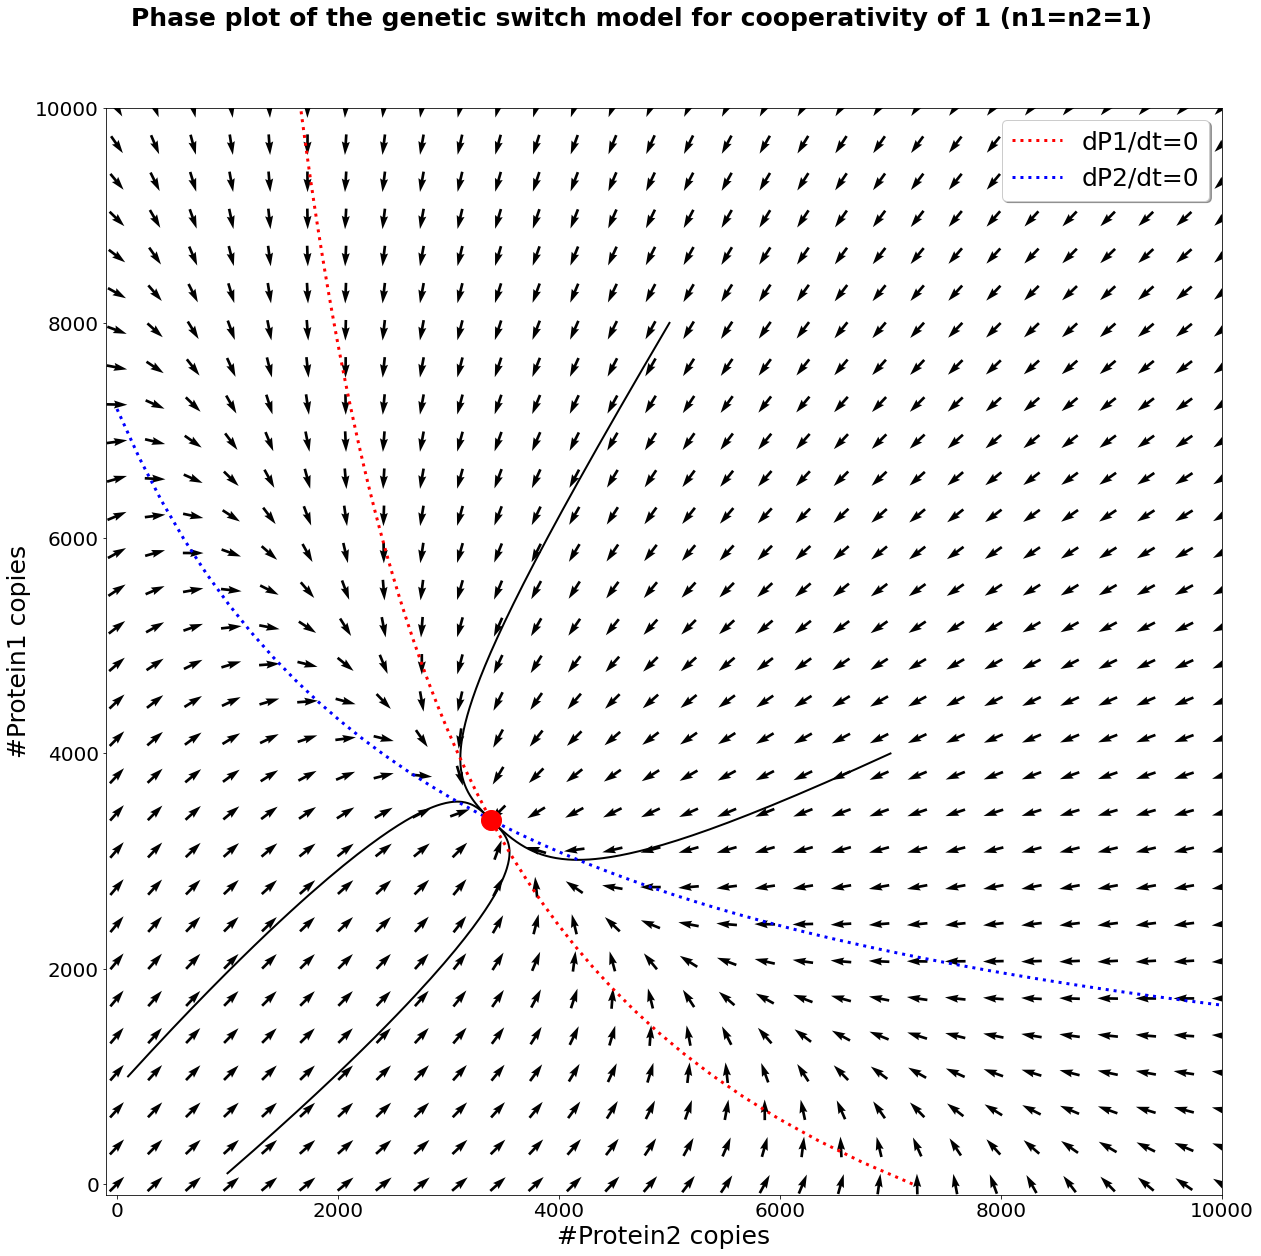

In [10]:
# Figure 6B

# import the direction_field function 
from helper_function import *

def sdot_toggle(s,t,params):
    # variables and parameters
    P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2 = params
    
    # rate equations
    rate_P1_production = kp1 * ((K2**n2)/(P2**n2 + K2**n2))
    rate_P2_production = kp2 * ((K1**n1)/(P1**n1 + K1**n1))
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dP1, dP2]
    return dsdt

# set parameters
kp1 = 120.0
kp2 = 120.0
kdp1 = 1.0/60.0
kdp2 = 1.0/60.0
K1 = 3000.0
K2 = 3000.0
n1= 1.0
n2= 1.0
params = [kp1, kp2, kdp1, kdp2, K1, K2, n1, n2]

# time points
t_start = 0
t_end = 10000
n_obs = 4000
t_obs = np.linspace(t_start, t_end, n_obs)

# make figure that the results will be plotted into
fig7 = plt.figure(figsize=(20,20))
fig7.suptitle('Phase plot of the genetic switch model for cooperativity of 1 (n1=n2=1) ', 
              fontsize=25, fontweight='bold', y=0.95)
ax1 = fig7.add_subplot(1,1,1)
ax1.set_xlim(-100,10000)
ax1.set_ylim(-100,10000)

# Generate 4 sets of initial conditions
s0_list = [ [100,1000], [1000,100], [7000,4000], [5000,8000] ]

# Calculate the values of P1 and P2 using odeint and plot results
for s0 in s0_list:
    s_obs = odeint(sdot_toggle, s0, t_obs, args=(params,))
    P1_obs = s_obs[:,0]
    P2_obs = s_obs[:,1]
    ax1.plot(P1_obs, P2_obs, 'k-', linewidth=2)

# Draw direction field onto the plot
draw_direction_field(ax1,sdot_toggle,params,normalise=True)

# Calculate the conditions for dP1/dt=0 (nullclines of P1)
P2_vals = np.linspace(0,20000,100)
P1_vals = []
for P2 in P2_vals:
    P1_ss = (kp1/(kdp1)) * ((K2**n2)/(((P2**n2 + K2**n2))))
    P1_vals.append(P1_ss)

P1_nullcline_P1_vals = P1_vals    # x vals
P1_nullcline_P2_vals = P2_vals   # y vals

# Calculate the conditions for dP2/dt=0 (nullclines of P2)
P1_vals = np.linspace(0,20000,100)
P2_vals = []
for P1 in P1_vals:
    P2_ss = (kp2/kdp2) * ((K1**n1)/(((P1**n1 + K1**n1))))
    P2_vals.append(P2_ss)

P2_nullcline_P1_vals = P1_vals   # x vals
P2_nullcline_P2_vals = P2_vals    # y vals

# Plot nullclines
ax1.plot(P1_nullcline_P1_vals, P1_nullcline_P2_vals, 'r:', linewidth=3, label='dP1/dt=0')
ax1.plot(P2_nullcline_P1_vals, P2_nullcline_P2_vals, 'b:', linewidth=3, label='dP2/dt=0')

# Plot intersections
first_line = LineString(np.column_stack((P1_nullcline_P1_vals, P1_nullcline_P2_vals)))
second_line = LineString(np.column_stack((P2_nullcline_P1_vals, P2_nullcline_P2_vals)))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    ax1.plot(*LineString(intersection).xy, 'ro', markersize = '20')
elif intersection.geom_type == 'Point':
    ax1.plot(*intersection.xy, 'ro', markersize = '20')

# Define plot axes
ax1.legend(loc = 1, prop={'size': 25}, shadow=True)
ax1.set_xlabel('#Protein2 copies')
ax1.set_ylabel('#Protein1 copies')
ax1.xaxis.label.set_size(25)
ax1.yaxis.label.set_size(25)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

plt.savefig('fig6B.png');